In [1]:
import random
import math
import matplotlib.pyplot as plt
from numba import jit
import numpy as np

In [5]:
@jit
def iter(x, c):
    return x * x + c

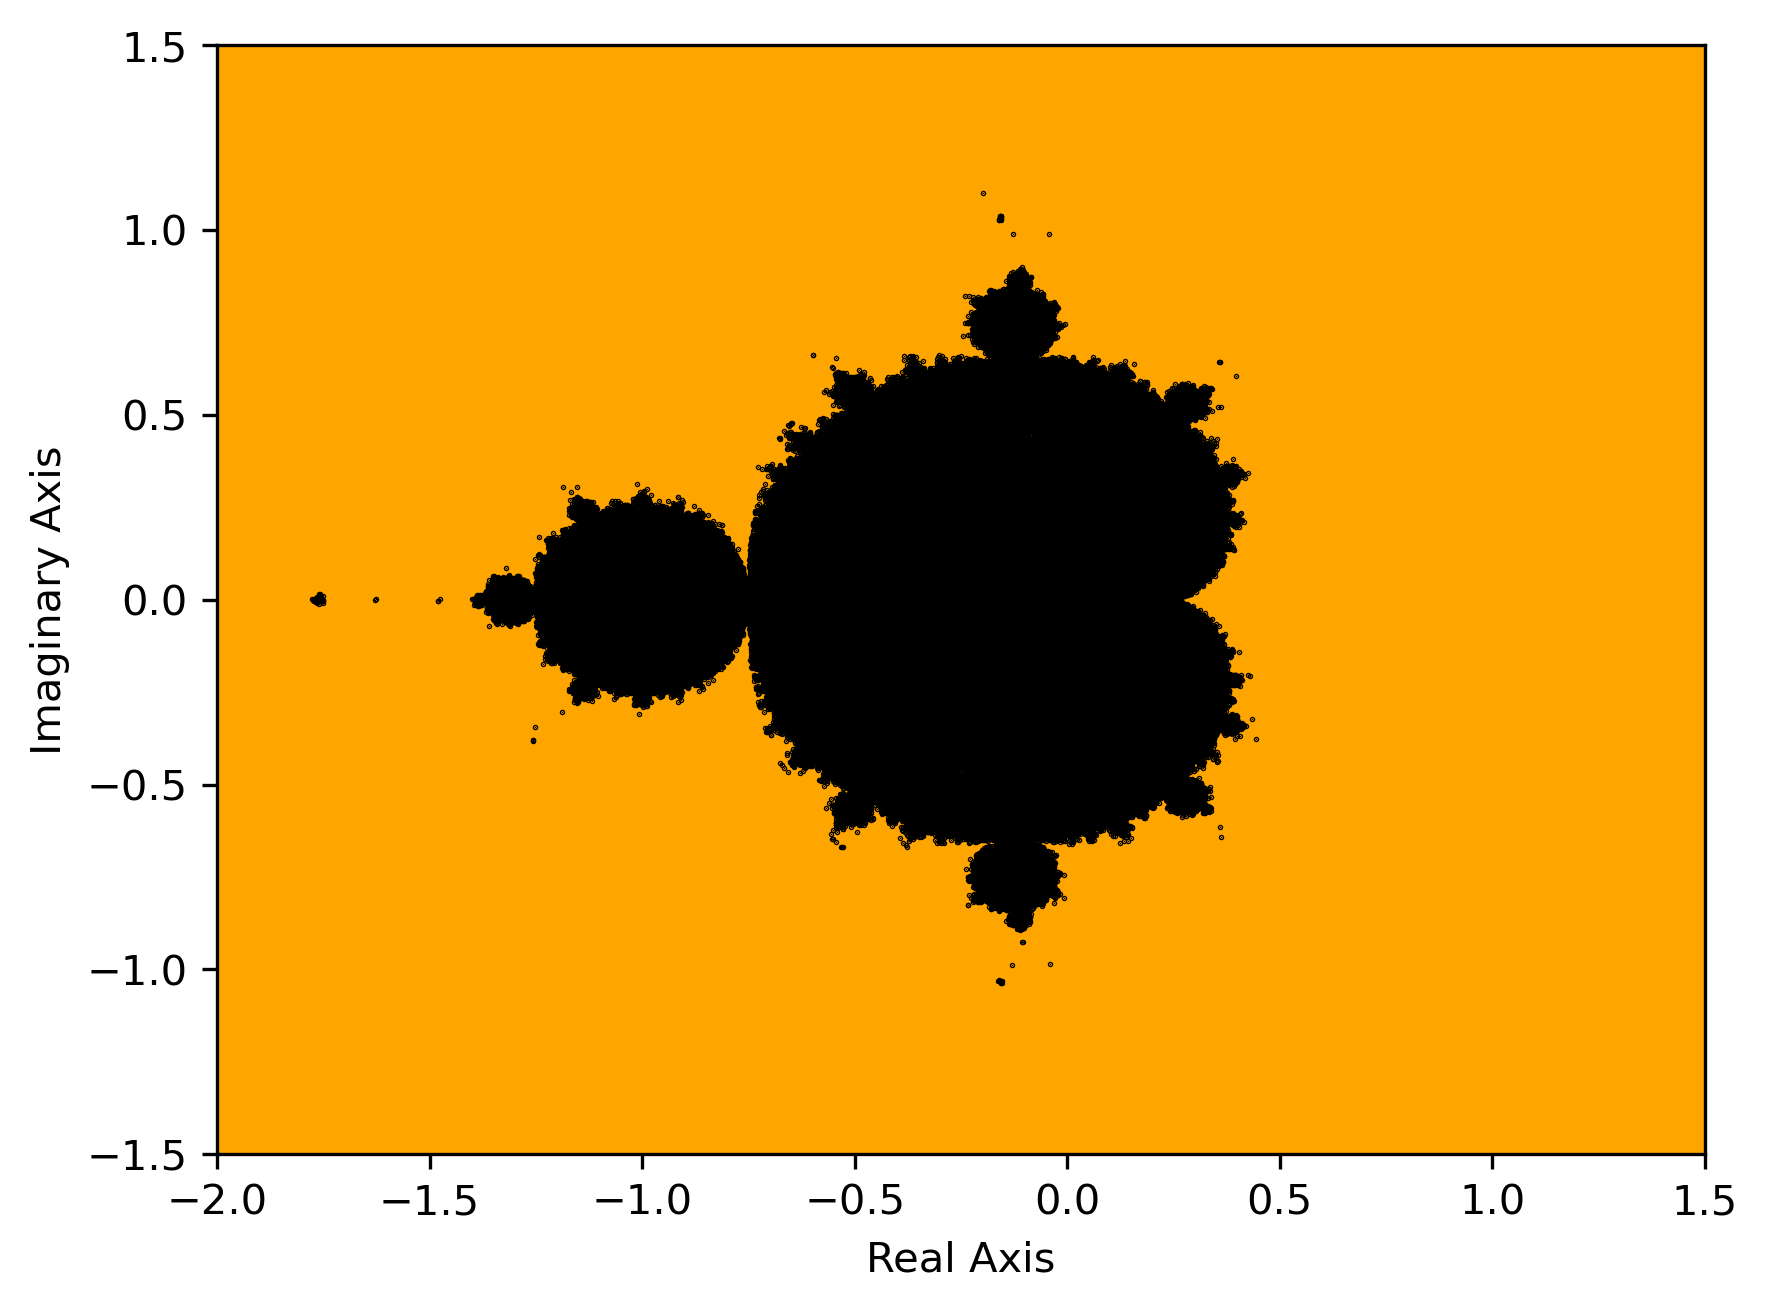

In [14]:
# Implementation of the iteration
iter_num = 100  # number of iterations
s_num = int(1e6)  # number of samples
bound = 1e6  # if x > bound, then we think x will be infinity during future iterations
cs = []  # points in the Mandelbrot set
for s in range(s_num):
    x = complex(0, 0)
    real = random.uniform(-2, 1.5)
    imag = random.uniform(-1.5, 1.5)
    c = complex(real, imag)
    f = 1  # if current c is in the Mandelbrot set
    for i in range(iter_num):
        if abs(x) < bound:
            x = iter(x, c)
        else:
            f = 0
            break
    if f:
        cs.append(c)

# Plot the Mandelbrot set
cs_real = [c.real for c in cs]
cs_imag = [c.imag for c in cs]
plt.figure(dpi=300)
ax = plt.subplot()
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.scatter(
    cs_real,
    cs_imag,
    s=0.1,
    c='k',
)
ax.set_xlim(-2, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_facecolor("orange")
plt.show()

In [15]:
def compute_area(iter_num, s_num):
    '''Compute the area of the Mandelbrot set
    Arguments: 
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
    Returns:
        A: the area of the Mandelbrot set
    '''
    bound = 1e6  # if x > bound, then we think x will be infinity during future iterations
    cs = []  # points in the Mandelbrot set
    for s in range(s_num):
        x = complex(0, 0)
        real = random.uniform(-2, 1.5)
        imag = random.uniform(-1.5, 1.5)
        c = complex(real, imag)
        f = 1  # if current c is in the Mandelbrot set
        for i in range(iter_num):
            if abs(x) < bound:
                x = iter(x, c)
            else:
                f = 0
                break
        if f:
            cs.append(c)

    A = len(cs) / s_num * 3 * 3.5
    return A


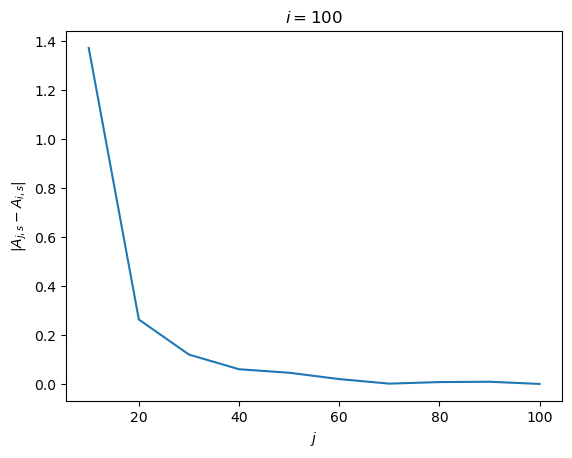

In [20]:
# Investigate the convergence
s = int(1e5)
i = 100
j_start, j_step_len = 10, 10
j_set = np.arange(j_start, i + j_step_len, j_step_len)
As = []
for j in j_set:
    As.append(compute_area(j, s))
As = np.array(As)
plt.figure()
plt.plot(i_set, abs(As[-1] - As))
plt.title(r"$i=$" + str(i))
plt.xlabel(r"$j$")
plt.ylabel(r"$\left|A_{j,s}-A_{i,s}\right|$")
plt.show()

In [ ]:
# Latin hypercube sampling

In [ ]:
# Orthogonal sampling